In [14]:
import timeit

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
def get_tk(tensor_shape, kernel_shape, device, dtype=torch.uint8):
    t = torch.empty(tensor_shape, dtype=dtype, device=device).random_(0, 8)
    k = torch.empty(kernel_shape, dtype=dtype, device=device).random_(0, 8)
    return t, k


In [3]:
def get_tk2d(tensor_shape_2d, kernel_shape_2d, device, dtype=torch.uint8):
    return get_tk((1, 1, *tensor_shape_2d), (1, 1, *kernel_shape_2d), device, dtype)


In [7]:
def measure_conv2d_time(tensor_shape_2d, kernel_shape_2d, device, dtype=torch.uint8, iterations=1000000):
    t, k = get_tk2d(tensor_shape_2d, kernel_shape_2d, device, dtype)
    
    def _conv2d():
        F.conv2d(t, k)
    
    exec_time_s = timeit.timeit(_conv2d, number=iterations) / iterations
    return exec_time_s
    

In [13]:
tensor_size_grid = [(2 ** i, 2 ** i) for i in range(5, 11)]
kernel_size_grid = [(i, i) for i in range(1, 8)]
# device_grid = [torch.device('cpu'), torch.device('cuda')]
device_grid = [torch.device('cpu')]

results = []
for ts in tensor_size_grid:
    for ks in kernel_size_grid:
        for d in device_grid:
            print(f'ts: {ts} | ks: {ks} | d: {d.type}')
            exec_time_s = measure_conv2d_time(ts, ks, d, torch.uint8, 1000)
            results.append([*ts, *ks, d.type, exec_time_s])

results_columns = ['tensor.shape[0]', 'tensor.shape[1]', 'kernel.shape[0]', 'kernel.shape[1]', 'device', 'exec_time_s']
df = pd.DataFrame(results, columns=results_columns)
df['exec_time_us'] = df['exec_time_s'] * 1000000

ts: (32, 32) | ks: (1, 1) | d: cpu
ts: (32, 32) | ks: (2, 2) | d: cpu
ts: (32, 32) | ks: (3, 3) | d: cpu
ts: (32, 32) | ks: (4, 4) | d: cpu
ts: (32, 32) | ks: (5, 5) | d: cpu
ts: (32, 32) | ks: (6, 6) | d: cpu
ts: (32, 32) | ks: (7, 7) | d: cpu
ts: (64, 64) | ks: (1, 1) | d: cpu
ts: (64, 64) | ks: (2, 2) | d: cpu
ts: (64, 64) | ks: (3, 3) | d: cpu
ts: (64, 64) | ks: (4, 4) | d: cpu
ts: (64, 64) | ks: (5, 5) | d: cpu
ts: (64, 64) | ks: (6, 6) | d: cpu
ts: (64, 64) | ks: (7, 7) | d: cpu
ts: (128, 128) | ks: (1, 1) | d: cpu
ts: (128, 128) | ks: (2, 2) | d: cpu
ts: (128, 128) | ks: (3, 3) | d: cpu
ts: (128, 128) | ks: (4, 4) | d: cpu
ts: (128, 128) | ks: (5, 5) | d: cpu
ts: (128, 128) | ks: (6, 6) | d: cpu
ts: (128, 128) | ks: (7, 7) | d: cpu
ts: (256, 256) | ks: (1, 1) | d: cpu
ts: (256, 256) | ks: (2, 2) | d: cpu
ts: (256, 256) | ks: (3, 3) | d: cpu
ts: (256, 256) | ks: (4, 4) | d: cpu
ts: (256, 256) | ks: (5, 5) | d: cpu
ts: (256, 256) | ks: (6, 6) | d: cpu
ts: (256, 256) | ks: (7, 7) |

In [17]:
df

,tensor.shape[0],tensor.shape[1],kernel.shape[0],kernel.shape[1],device,exec_time_s,exec_time_us
0,32,32,1,1,cpu,0.000023,23.467074
1,32,32,2,2,cpu,0.000023,22.507462
2,32,32,3,3,cpu,0.000021,20.782683
3,32,32,4,4,cpu,0.000026,25.558551
4,32,32,5,5,cpu,0.000029,29.220681
5,32,32,6,6,cpu,0.000031,31.190199
6,32,32,7,7,cpu,0.000034,34.306979
7,64,64,1,1,cpu,0.000022,22.470732
8,64,64,2,2,cpu,0.000026,26.365837
9,64,64,3,3,cpu,0.000034,34.158595


In [36]:
def plot_time_by():
    _, axes = plt.subplots(ncols=7, sharey=True, figsize=(18, 5))
    for i, ks in enumerate(kernel_size_grid):
        data = df[df[f'kernel.shape[0]'] == ks[0]]
        sns.lineplot(x='tensor.shape[0]', y='exec_time_us', data=data, ax=axes[i]).set_title(f'kernel.shape[0] == {ks[0]}')
    plt.show()

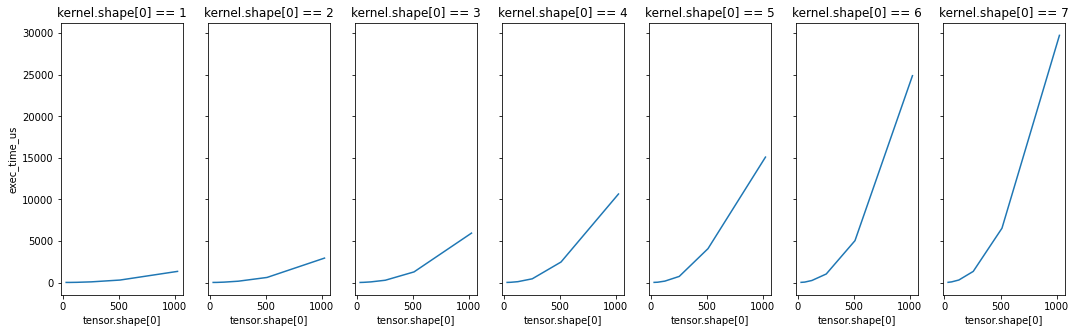

In [37]:
plot_time_by()

In [ ]:
224